# Project : Customer Churn Prediction

# Workflow:
1. Libraries import
2. Data import
3. EDA
4. Data Preprocessing
5. Data Splitting
6. Model training
7. Model Selection
8. Deployment of model

# 1. Libraries Importing

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Data Importing

In [22]:
data = pd.read_csv("D:\\churn_prediction\\Bank Customer Churn Prediction.csv")

In [23]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

In [24]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [25]:
data.shape

(10000, 12)

In [26]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [27]:
data.duplicated().sum()

0

In [28]:
data = data.drop(['customer_id'],axis=1) 

In [29]:
data['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [30]:
data['gender'] = data['gender'].map({'Male':1,'Female':0})
data['country']= data['country'].map({'France':1,'Germany':2,'Spain':3})

In [31]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,3,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,3,0,43,2,125510.82,1,1,1,79084.10,0


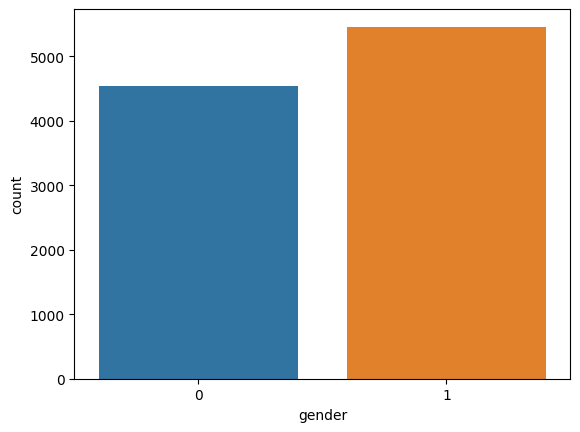

In [36]:
sns.countplot(data=data,x='gender')
plt.show()

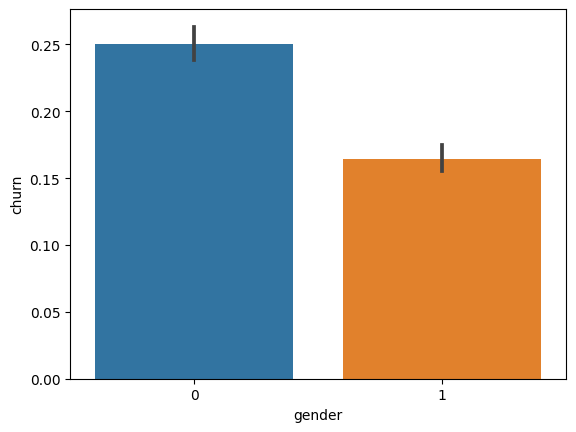

In [40]:
sns.barplot(data=data,x='gender',y='churn')
plt.show()

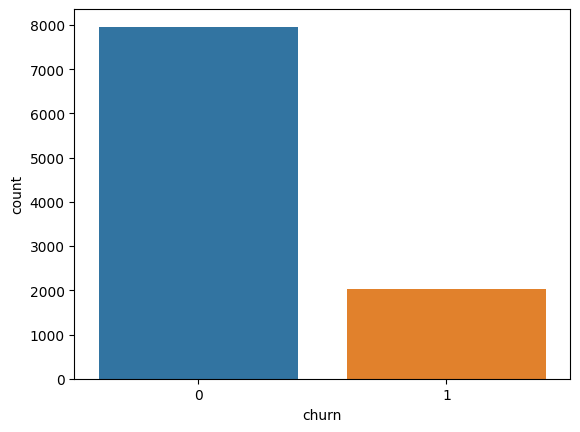

In [42]:
sns.countplot(data=data,x='churn')
plt.show()

# Data Splitting

In [43]:
X = data.drop('churn',axis=1)
y = data['churn']

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [46]:
from sklearn.metrics import accuracy_score

# Model Training

In [48]:
models = {
    'lr':LogisticRegression(),
    'rfc':RandomForestClassifier(),
    'dtc':DecisionTreeClassifier()
}

for name,model in models.items():
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    print(f"{name} gives accuracy {accuracy_score(y_test,prediction)}")

lr gives accuracy 0.8005
rfc gives accuracy 0.866
dtc gives accuracy 0.784


In [49]:
# RandomForestClassifier is selected as it gives high accuracy among other model

In [53]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
prediction_rfc = rfc.predict(X_test)

# Deployment

In [54]:
import pickle
pickle.dump(rfc,open('randomforest.pkl','wb'))